In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap
import os
import numpy as np

In [2]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DM_TS.json')

In [3]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DM (policy) 1:  41%|████      | 6694/16384 [00:02<00:02, 3240.52it/s]
The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)


Stopping at Epoch 6694



DM (policy) 1: 100%|██████████| 32768/32768 [00:08<00:00, 3664.12it/s]


AUC predicting P(win):				 0.672388080227816



DM (policy) 1:  21%|██▏       | 3497/16384 [00:05<00:19, 644.86it/s]


Stopping at Epoch 3497
agent: 1




DM (policy) 2:  28%|██▊       | 4647/16384 [00:01<00:03, 3675.46it/s]


Stopping at Epoch 4647



DM (policy) 2: 100%|██████████| 32768/32768 [00:08<00:00, 3908.21it/s]


AUC predicting P(win):				 0.6833304750865231



DM (policy) 2:  26%|██▌       | 4207/16384 [00:06<00:18, 663.68it/s]


Stopping at Epoch 4207
agent: 2




DM (policy) 3:  33%|███▎      | 5438/16384 [00:01<00:03, 2916.36it/s]


Stopping at Epoch 5438



DM (policy) 3: 100%|██████████| 32768/32768 [00:08<00:00, 3909.82it/s]


AUC predicting P(win):				 0.9589043885502117



DM (policy) 3:  22%|██▏       | 3600/16384 [00:05<00:19, 642.15it/s]


Stopping at Epoch 3600
number of iteration: 1

agent: 0




DM (policy) 1:  23%|██▎       | 3819/16384 [00:01<00:04, 2608.03it/s]


Stopping at Epoch 3819



DM (policy) 1:  52%|█████▏    | 17044/32768 [00:04<00:04, 3866.38it/s]


Epoch 16408: reducing learning rate of group 0 to 3.0000e-04.
Epoch 16510: reducing learning rate of group 0 to 3.0000e-05.
Epoch 16611: reducing learning rate of group 0 to 3.0000e-06.
Epoch 16712: reducing learning rate of group 0 to 3.0000e-07.
Epoch 16813: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 17044
AUC predicting P(win):				 0.7011220778946591



DM (policy) 1:  10%|█         | 1713/16384 [00:02<00:22, 641.14it/s]


Stopping at Epoch 1713
agent: 1




DM (policy) 2:  13%|█▎        | 2112/16384 [00:00<00:03, 4002.04it/s]


Stopping at Epoch 2112



DM (policy) 2:  33%|███▎      | 10878/32768 [00:02<00:05, 3753.08it/s]


Epoch 10286: reducing learning rate of group 0 to 3.0000e-04.
Epoch 10388: reducing learning rate of group 0 to 3.0000e-05.
Epoch 10489: reducing learning rate of group 0 to 3.0000e-06.
Epoch 10590: reducing learning rate of group 0 to 3.0000e-07.
Epoch 10691: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 10878
AUC predicting P(win):				 0.8217917424790407



DM (policy) 2:  10%|▉         | 1559/16384 [00:02<00:24, 615.83it/s]

Epoch 01464: reducing learning rate of group 0 to 2.0000e-04.


DM (policy) 2:  10%|▉         | 1619/16384 [00:02<00:23, 630.31it/s]


Stopping at Epoch 1619
agent: 2




DM (policy) 3:  16%|█▌        | 2557/16384 [00:00<00:04, 3240.84it/s]


Stopping at Epoch 2557



DM (policy) 3:  60%|█████▉    | 19640/32768 [00:05<00:03, 3803.19it/s]


Epoch 19027: reducing learning rate of group 0 to 3.0000e-04.
Epoch 19129: reducing learning rate of group 0 to 3.0000e-05.
Epoch 19230: reducing learning rate of group 0 to 3.0000e-06.
Epoch 19331: reducing learning rate of group 0 to 3.0000e-07.
Epoch 19432: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 19640
AUC predicting P(win):				 0.7453510530707548



DM (policy) 3:  11%|█▏        | 1864/16384 [00:02<00:21, 680.62it/s]

Epoch 01760: reducing learning rate of group 0 to 2.0000e-04.



DM (policy) 3:  13%|█▎        | 2113/16384 [00:03<00:20, 680.35it/s]


Stopping at Epoch 2113
number of iteration: 2

agent: 0




DM (policy) 1:   6%|▋         | 1025/16384 [00:00<00:05, 2745.53it/s][A


Stopping at Epoch 1025



DM (policy) 1:  42%|████▏     | 13926/32768 [00:03<00:05, 3718.59it/s]

Epoch 13325: reducing learning rate of group 0 to 3.0000e-04.
Epoch 13427: reducing learning rate of group 0 to 3.0000e-05.
Epoch 13528: reducing learning rate of group 0 to 3.0000e-06.
Epoch 13629: reducing learning rate of group 0 to 3.0000e-07.
Epoch 13730: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 13926


AUC predicting P(win):				 0.8290214583432385



DM (policy) 1:   6%|▌         | 914/16384 [00:01<00:23, 649.48it/s]

Epoch 00798: reducing learning rate of group 0 to 2.0000e-04.



DM (policy) 1:   7%|▋         | 1107/16384 [00:01<00:24, 626.59it/s]


Stopping at Epoch 1107
agent: 1




DM (policy) 2:   6%|▋         | 1025/16384 [00:00<00:06, 2341.76it/s][A


Stopping at Epoch 1025



DM (policy) 2:  28%|██▊       | 9218/32768 [00:02<00:06, 3608.79it/s]


Epoch 08604: reducing learning rate of group 0 to 3.0000e-04.
Epoch 08706: reducing learning rate of group 0 to 3.0000e-05.
Epoch 08807: reducing learning rate of group 0 to 3.0000e-06.
Epoch 08908: reducing learning rate of group 0 to 3.0000e-07.
Epoch 09009: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 9218
AUC predicting P(win):				 0.6922228779565504



DM (policy) 2:  10%|█         | 1673/16384 [00:02<00:23, 621.42it/s]


Stopping at Epoch 1673
agent: 2




DM (policy) 3:   7%|▋         | 1117/16384 [00:00<00:04, 3062.06it/s][A


Stopping at Epoch 1117



DM (policy) 3:  13%|█▎        | 4225/32768 [00:01<00:07, 3846.66it/s]


Epoch 03620: reducing learning rate of group 0 to 3.0000e-04.
Epoch 03722: reducing learning rate of group 0 to 3.0000e-05.
Epoch 03823: reducing learning rate of group 0 to 3.0000e-06.
Epoch 03924: reducing learning rate of group 0 to 3.0000e-07.
Epoch 04025: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 4225
AUC predicting P(win):				 0.8057272441686956



DM (policy) 3:   7%|▋         | 1119/16384 [00:01<00:24, 614.83it/s]


Epoch 01041: reducing learning rate of group 0 to 2.0000e-04.
Stopping at Epoch 1119


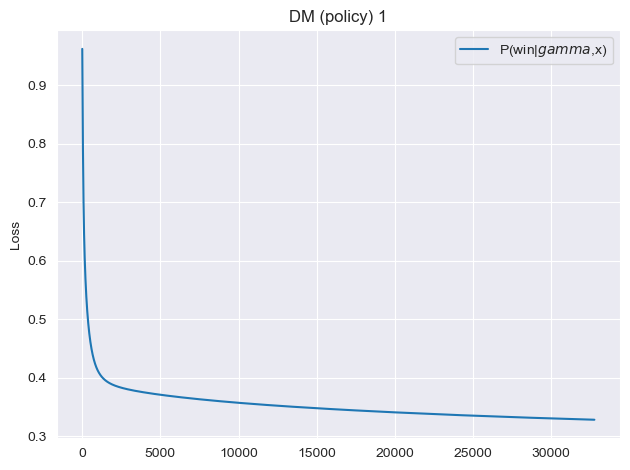

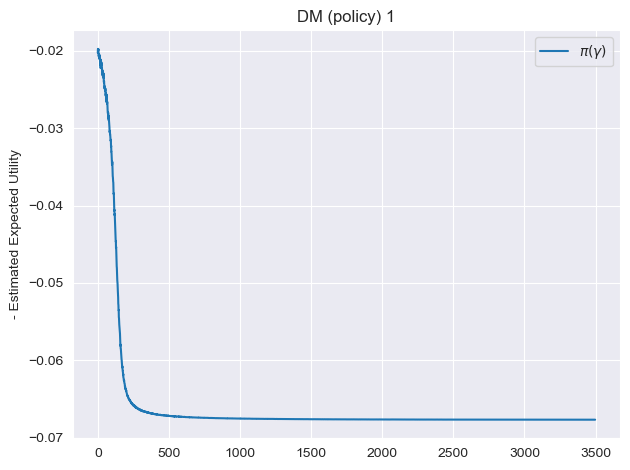

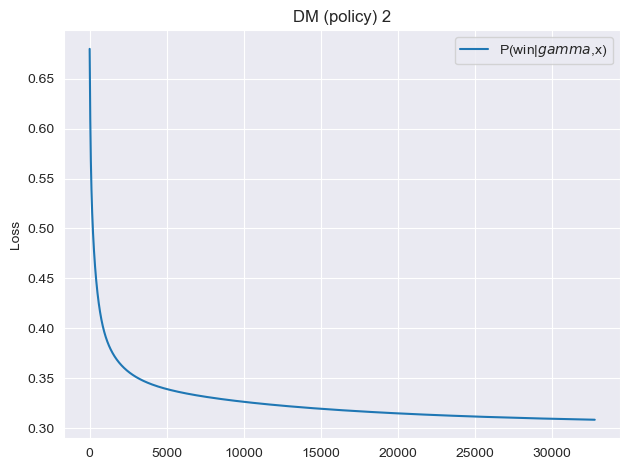

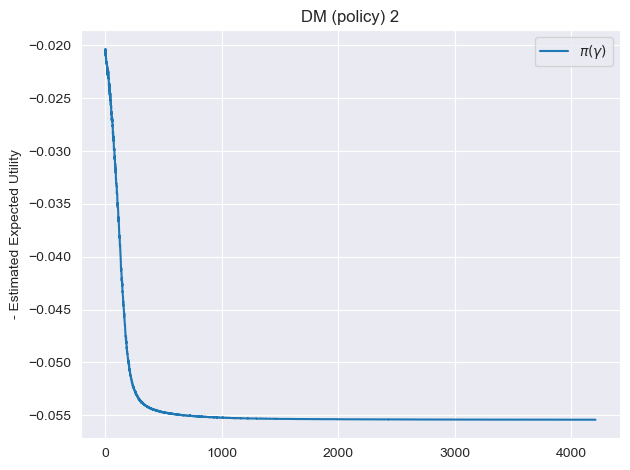

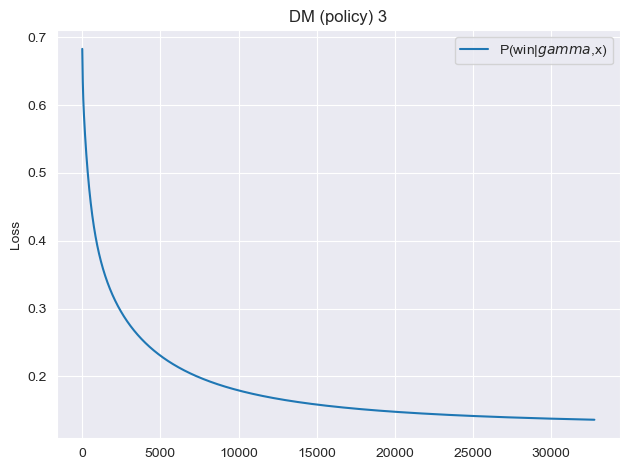

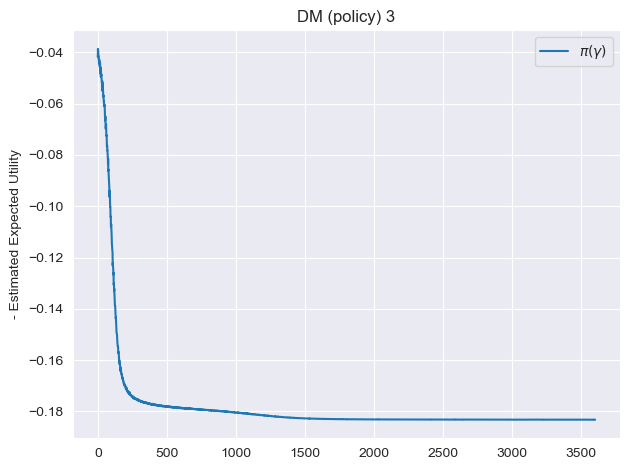

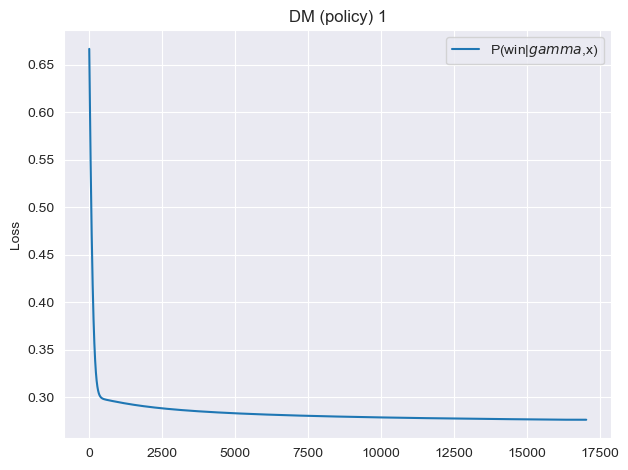

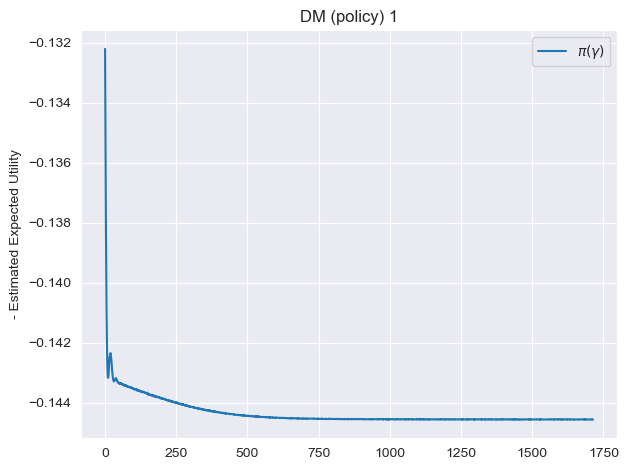

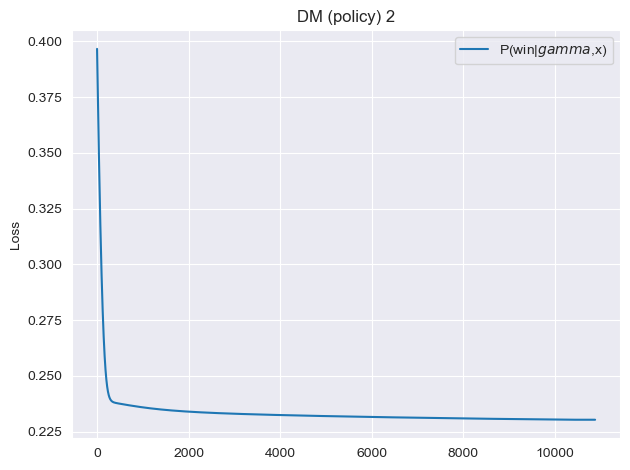

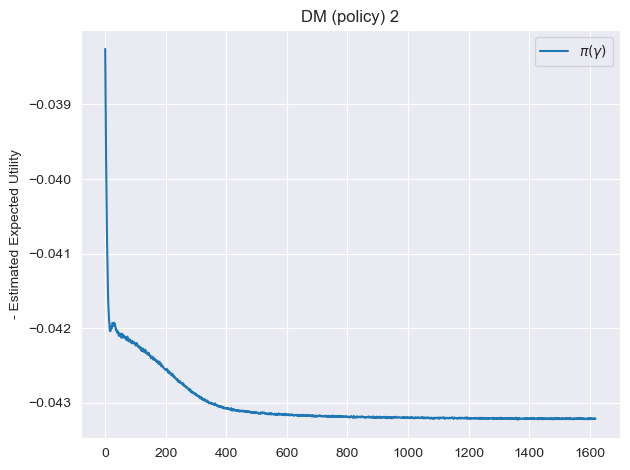

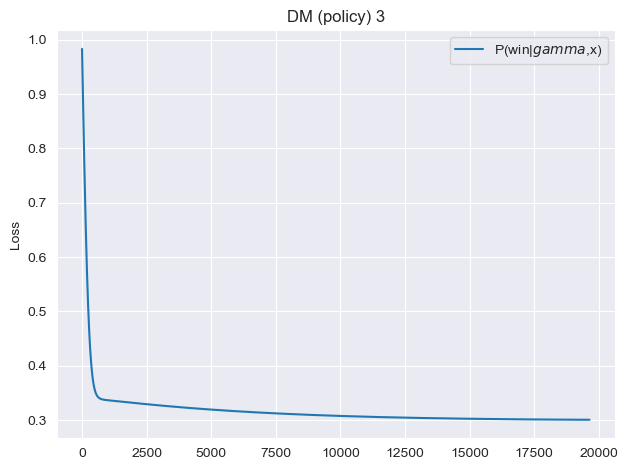

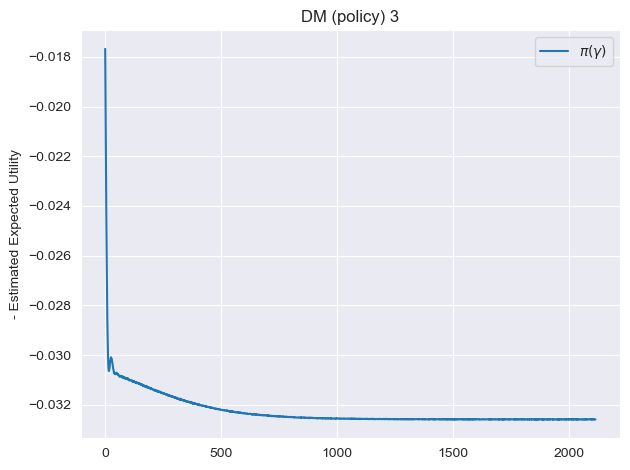

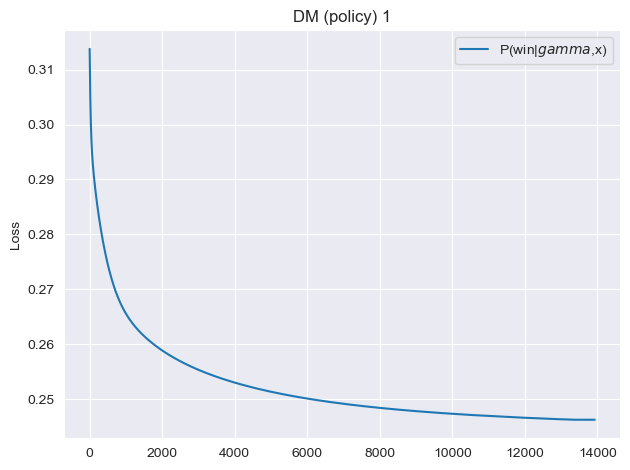

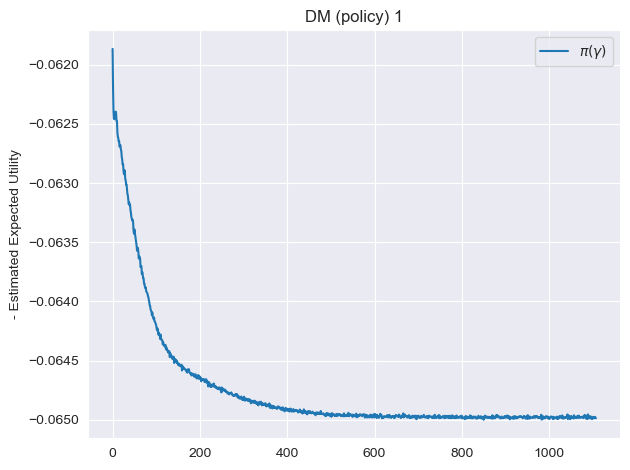

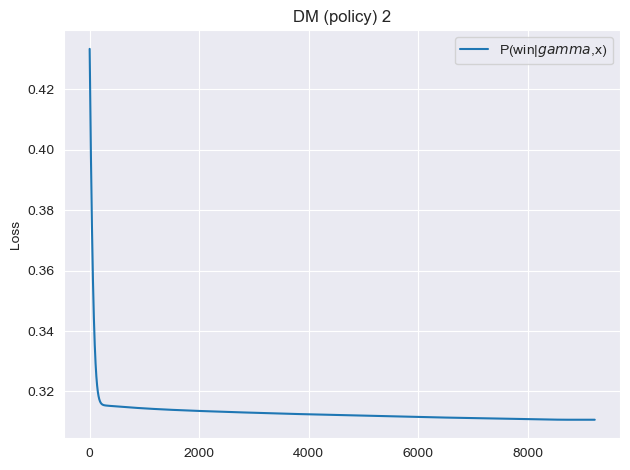

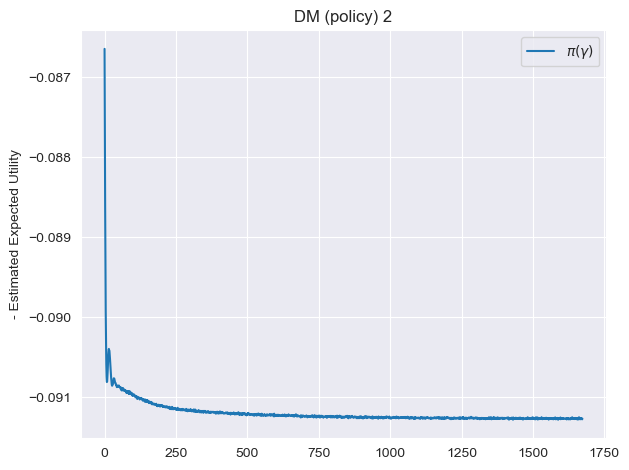

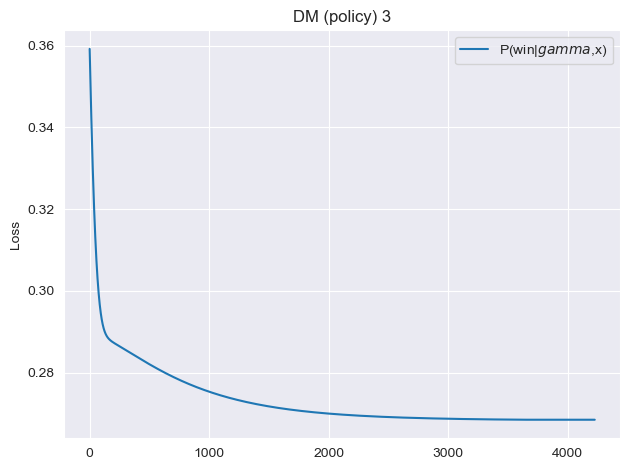

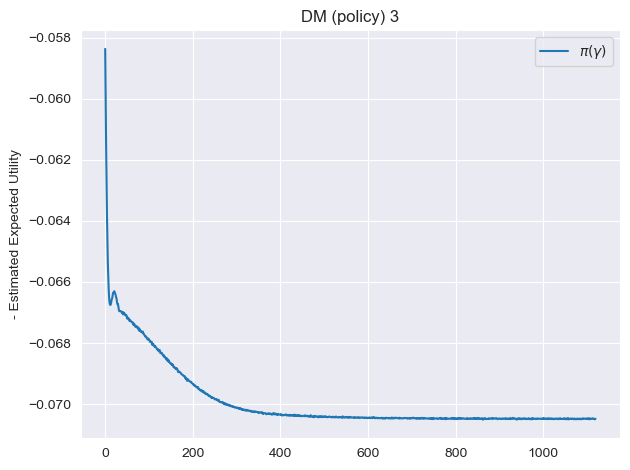

In [4]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

In [20]:
# data generation
# just take the first agent's data (dont know is it correct)
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplu
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'test':{}}


num_data = [80000, 20000]

for i, data_set in enumerate(offline_data.keys()):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(agent.bidder.gammas)
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

In [23]:
offline_data['train'][2]

array([[-1.98743756, -1.11014509, -0.99319131, ...,  1.        ,
         1.        ,  0.749069  ],
       [-0.55848799, -0.77288078, -0.22927191, ...,  1.        ,
         0.        , -0.32669619],
       [-0.56129978, -0.32719797, -1.01656575, ...,  1.        ,
         1.        ,  1.02754426],
       ...,
       [-0.38470925,  1.7986688 ,  1.65609301, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94408449,  0.64008054, -0.0237975 , ...,  1.        ,
         0.        , -0.26591267],
       [ 0.79884757, -1.44069215, -0.22367731, ...,  1.        ,
         0.        , -0.36137305]])

In [ ]:
offline_data_key = {'context': 0, 'estimated_CTR': 5, 'value': 6, 'bid': 7, 'gamma': 8, 'true_CTR': 9, 'price': 10, 'second_price': 11, 'won_mask': 12, 'outcome': 13, 'utility': 14}

In [24]:
estimator = "DM"
competition = "L"
data_dir = f"../data_{estimator}_{competition}/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        np.savetxt(f'{data_dir}{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [26]:
import sys
sys.path.append("/Users/keithwu/Documents/GitHub/auction-gym/src/c_utree_boost")
from c_utree_boost import Agent_boost_Galen_action_numpy as Agent
from c_utree_boost import Problem

Instructions for updating:
non-resource variables are not supported in the long term


In [27]:
problem = Problem.Problem(games_directory="../data_DR_L_split/agent_0/train/")

CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=3000,
                            check_fringe_freq=1200, is_episodic=0, training_mode='')

In [28]:
pred = CUTreeAgent.get_prediction_new(save_path="./UTree_model_numpy/DM/model_boost_linear_qsplit_noabs_save/", read_game_number=200)

<ipykernel.iostream.OutStream object at 0x10425fbb0> starting from 200
<ipykernel.iostream.OutStream object at 0x10425fbb0> finishing read tree
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 0 - [0.28082482]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 1 - [0.46921004]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 2 - [0.34725576]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 3 - [0.29690167]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 4 - [0.14415335]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 5 - [0.22339523]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 6 - [0.49261979]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 7 - [0.2316069]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 8 - [0.35622179]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 9 - [0.4341228]
<ipykernel.iostrea

In [29]:
def read_csv_game_record_auction(self, csv_dir):
    data = np.genfromtxt(csv_dir, delimiter=' ')
    return data

In [42]:
label = read_csv_game_record_auction("", "/Users/keithwu/Documents/GitHub/auction-gym/data_DM_L/test_0.csv")

In [43]:
mean_squared_error(label[:, 7], pred)

0.03728344925568641

In [44]:
r2_score(label[:, 7], pred)

-0.8104928158810254

In [40]:
mean_squared_error(label[:, 7], pred_new)

0.03624549971724814

In [41]:
r2_score(label[:, 7], pred_new)

-0.7600897491019263

In [39]:
pred_new = CUTreeAgent.get_prediction_new(save_path="./UTree_model_numpy/DM/model_boost_linear_qsplit_noabs_save_1000/", read_game_number=20)

<ipykernel.iostream.OutStream object at 0x10425fbb0> starting from 20
<ipykernel.iostream.OutStream object at 0x10425fbb0> finishing read tree
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 0 - [0.1353173]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 1 - [0.28961413]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 2 - [0.36302357]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 3 - [0.29208379]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 4 - [0.13867251]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 5 - [0.31343644]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 6 - [0.49319421]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 7 - [0.4146873]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 8 - [0.37266641]
<ipykernel.iostream.OutStream object at 0x10425fbb0> finish index: 9 - [0.26927294]
<ipykernel.iostream

In [36]:
label[:, 7]

array([0.22840604, 0.4577979 , 0.32519193, ..., 0.37856645, 0.41262814,
       0.37018989])

In [7]:
def gridSearch(model, param_grid, input_data, output_data):
    grid_cv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1).fit(input_data, output_data)
    print("Param for GS", grid_cv.best_params_)
    print("CV score for GS", grid_cv.best_score_)
    return grid_cv.best_estimator_

In [8]:
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}
model = tree.DecisionTreeRegressor()
# should I set random state here?
# mb k-fold is not nesscary here
# input_data = np.hstack((trained_data[0][:, :5], trained_data[0][:, 5].reshape(-1, 1)))

In [9]:
# context with bid
for agent_id in trained_data.keys():
    input_train_data = trained_data[agent_id][:, :5]
    label_train_data = trained_data[agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = test_data[agent_id][:, :5]
    label_test_data = test_data[agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

# cv fault is 5

Agent 0
Param for GS {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS 0.8639191128560061
Test R2 score: 0.8645499398426056
Train MSE:  0.0007306870469921774
Test MSE:  0.002395683077391878
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.7028148004374897
Test R2 score: 0.7040580600050846
Train MSE:  0.0031129841043404305
Test MSE:  0.005301778084897266
Agent 2
Param for GS {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS 0.850666772447928
Test R2 score: 0.849585671931249
Train MSE:  0.0007812613219821731
Test MSE:  0.0022585459500784485


In [10]:
# context with gamma
for agent_id in trained_data.keys():
    input_train_data = trained_data[agent_id][:, :5]
    label_train_data = trained_data[agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = test_data[agent_id][:, :5]
    label_test_data = test_data[agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10}
CV score for GS 0.8385008220037455
Test R2 score: 0.8407685865675729
Train MSE:  0.0006496727951056531
Test MSE:  0.0022536302468574767
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.6528005528682634
Test R2 score: 0.6813368900657799
Train MSE:  0.0018041033015898347
Test MSE:  0.0029555866058357484
Agent 2
Param for GS {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10}
CV score for GS 0.8515510596706187
Test R2 score: 0.8392131879223406
Train MSE:  0.0009975086653575954
Test MSE:  0.003073507140314886


In [11]:
# estimated_CTR and value with bid
for agent_id in trained_data.keys():
    input_train_data = trained_data[agent_id][:, 5:7]
    label_train_data = trained_data[agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = test_data[agent_id][:, 5:7]
    label_test_data = test_data[agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
CV score for GS 0.997464257767315
Test R2 score: 0.9977732999096449
Train MSE:  1.7859535817045202e-05
Test MSE:  3.9383280588373254e-05
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
CV score for GS 0.997910580982427
Test R2 score: 0.9978988867021998
Train MSE:  1.4794237273398896e-05
Test MSE:  3.7641290167776574e-05
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
CV score for GS 0.9973681127490372
Test R2 score: 0.9967183793060721
Train MSE:  2.050573564871453e-05
Test MSE:  4.92751669546856e-05


In [12]:
# estimated_CTR and value with gamma
for agent_id in trained_data.keys():
    input_train_data = trained_data[agent_id][:, 5:7]
    label_train_data = trained_data[agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = test_data[agent_id][:, 5:7]
    label_test_data = test_data[agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.9899609507011731
Test R2 score: 0.9918362962401978
Train MSE:  9.484421140735846e-05
Test MSE:  0.00011554233755063695
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.9861882562278153
Test R2 score: 0.9872870013306174
Train MSE:  9.694977949029236e-05
Test MSE:  0.00011791251455178255
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15}
CV score for GS 0.994131372528174
Test R2 score: 0.9939636142524255
Train MSE:  6.504907235135002e-05
Test MSE:  0.00011538803747103455
